In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("country_vaccinations.csv") # using the new and updated vaccine dataset

In [3]:
df.head() # first 5 rows

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


# Calculating Percent Differences BEFORE Cleaning Daily Vaccinations

In [4]:
# create a list of each unique country
country_list = list(df['country'].unique())

In [5]:
# initialize a dataframe for percent difference of each country
percent_df = pd.DataFrame(columns=['country','percent_difference'])


for country in country_list:
    '''
    calculate percent_difference for each country and add to dataframe
    '''
    
    # filter dataframe to country in current loop
    country_df = df[df['country'] == country]
    
    # calculate sum of daily vaccinations and total vaccines
    daily_sum = country_df['daily_vaccinations'].sum()
    total_vaccines = country_df['total_vaccinations'].max()
    
    # calculate percent difference
    percent_diff = abs(daily_sum - total_vaccines) / total_vaccines
    percent_diff = round(percent_diff * 100, 2)
    
    # add country and calculation of percent difference to dataframe
    percent_df = percent_df.append({'country':country,'percent_difference':percent_diff},ignore_index = True)

In [6]:
percent_df.head() # first 5 rows

,country,percent_difference
0,Albania,15.64
1,Algeria,7.91
2,Andorra,21.97
3,Anguilla,3.92
4,Argentina,13.34


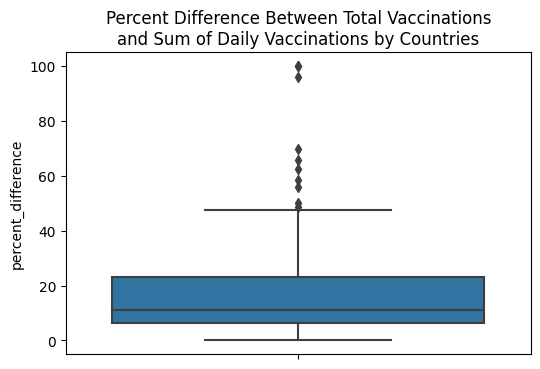

In [7]:
# create a boxplot for percent differences
plt.figure(figsize=(6,4),dpi=100)
plt.title('Percent Difference Between Total Vaccinations\nand Sum of Daily Vaccinations by Countries')

sns.boxplot(data=percent_df,y="percent_difference");

Compared to Toby's boxplot, this boxplot has a much higher percent difference (median of about 10%) than Toby's boxplot (median of only about 2%).

# Calculating Percent Differences AFTER Cleaning Daily Vaccinations

Haven't decided on how to clean daily vaccines. Linear Regression is an option but don't know if it will work best.

Below, I look at a time graph of daily vaccinations for Albania.

In [8]:
country_df = df[df['country'] == 'Albania'] # filter dataframe to the country of Alabania

In [9]:
date_df = country_df[['date','daily_vaccinations']].sort_values('date',ascending=True) # sort by ascending date

In [10]:
date_df.head() # first 5 rows

,date,daily_vaccinations
0,2021-01-10,NaN
1,2021-01-11,64.0
2,2021-01-12,64.0
3,2021-01-13,63.0
4,2021-01-14,66.0


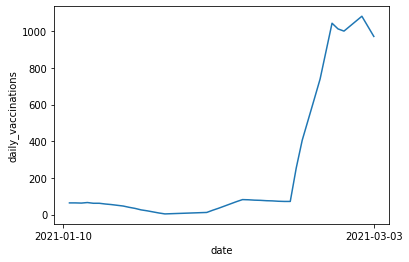

In [11]:
t = [country_df['date'].min(),country_df['date'].max()] # min and max date for country

# plot line graph of daily vaccinations for Alabania
sns.lineplot(data=date_df,x='date',y='daily_vaccinations')
plt.xticks(t,t)
plt.ticklabel_format(style='plain',axis='y')

Above graph shows daily vaccinations by date for the country of Albania. The graph does not appear linear, which suggests that a linear regression might not be the best option to clean the daily vaccinations column in our dataset.